# Classification task to predict bankruptcy

## About the dataset.  
- The dataset was collected from Emerging Markets Information Service (EMIS, [Web Link]). 
- 5 year financial data made up of financial indicators that can lead to bankruptcy in Polish companies.  
- The raw data set consists of the files separated into each year.

## Approach.  
- This is a prediction project. 
- We will apply Ensemble techniques 
- To compare with previous studies we will use Area Under the Curve (AUC) metric.  
- We will check for class imbalance and watch the precision and recall.  
- As advised in class we will combine the datasets.  
- We will also add the year as a feature just in case it is important.  


###  Choice of AUC.  
- Classification report will return accuracy, precision and recall for a specific class probability threshold.  
- Given our class imbalance, reporting AUC values will provide us with additional information on the behavior of our classifier.  
- The higher the AUC value the better the classifier.  
- We also focus on recall as well as precision.  



In [1]:
# Here we import all the libraries.

import pandas as pd
import os
import numpy as np
import copy

**Set our working directory**

In [2]:
os.getcwd()

'C:\\Users\\olani\\OneDrive\\Documents\\Data Science\\SMU-Data Science\\Quantifying the world'

## Custom funtion.  

**We write a custom function that:**  
- read in the dataset.  
- exclude the first irrelevant rows of data.  
- splits the data into train and test.  
- Apply selected estimators to the train and test dataset.

## Estimators:  
- Logistic regression.  
- Random Forest.  
- XGBoost.  

In [3]:
root = './fin_bankrupt'

In [6]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import xgboost as xgb

## Just using iris dataset to debug the codes lines 

In [7]:
from sklearn.datasets import load_iris
iris = load_iris()

In [8]:
logistic = LogisticRegression(solver='saga', tol=1e-2, max_iter=200,random_state=0)
distributions = dict(C=uniform(loc=0, scale=4),penalty=['l2', 'l1'])
clf1 = RandomizedSearchCV(logistic, distributions, random_state=0)
search = clf1.fit(iris.data, iris.target)
clf_ = logistic.set_params(**search.best_params_)
clf_cl = clf_.fit(iris.data, iris.target)
clf_pred = clf_cl.predict(iris.data)
print(classification_report(iris.target, clf_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      0.94      0.97        50
           2       0.94      1.00      0.97        50

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150



In [9]:
search.best_params_.keys()

dict_keys(['C', 'penalty'])

In [10]:
params = { 'max_depth': [3, 5, 6, 10, 15, 20],
   'learning_rate': [0.01, 0.1, 0.2, 0.3],
   'subsample': np.arange(0.5, 1.0, 0.1),
   'colsample_bytree': np.arange(0.4, 1.0, 0.1),
   'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
   'n_estimators': [100, 500, 1000]
    #'num_round':[100, 200,500,1000]
         }

xgb_clf = xgb.XGBClassifier(seed=123)
clf1 = RandomizedSearchCV(estimator=xgb_clf,
                 param_distributions=params,
                 scoring='roc_auc',
                 n_iter=25,
                 verbose=1)
search = clf1.fit(iris.data, iris.target)
params = search.best_params_
params['objective']= 'binary:logistic'
params['num_class']= 2
#clf_ = clf.set_params(**clf.best_params_)

#clf_.fit(train, y_train, early_stopping_rounds=2, eval_set=[(test, y_test)])

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[17:27:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages

[17:27:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:27:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,
C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBCla

[17:27:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:27:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,
C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBCla

[17:27:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,
C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBCla

[17:27:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,
C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBCla

[17:27:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,
C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBCla

[17:27:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,
C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBCla

[17:27:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,
C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBCla

[17:27:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,
C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBCla

[17:27:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,
C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBCla

[17:27:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,
C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBCla

[17:27:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,
C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBCla

[17:27:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,
C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBCla

[17:27:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:27:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,
C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBCla

[17:27:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:27:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,
C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBCla

[17:27:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:27:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,
C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBCla

[17:27:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,
C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBCla

[17:27:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,
C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBCla

[17:27:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,
C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBCla

[17:27:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,
C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBCla

[17:27:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:27:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,
C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBCla

[17:27:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:27:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,
C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBCla

[17:27:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:27:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,
C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBCla

[17:27:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,
C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBCla

[17:27:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,
C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBCla

[17:27:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,
C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBCla

[17:27:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,
C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBCla

[17:27:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,
C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBCla

[17:27:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,
C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBCla

[17:27:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,
C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBCla

[17:27:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,
C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBCla

[17:27:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,
C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBCla

[17:27:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,
C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBCla

[17:27:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,
C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBCla

[17:27:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,
C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBCla

[17:27:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,
C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBCla

[17:27:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,
C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBCla

[17:27:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,
C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBCla

[17:27:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,
C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBCla

[17:28:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,
C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBCla

[17:28:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,
C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBCla

[17:28:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,
C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBCla

[17:28:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,
C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBCla

[17:28:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,
C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBCla

[17:28:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,
C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBCla

[17:28:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,
C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBCla

[17:28:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,
C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBCla

[17:28:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,
C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBCla

[17:28:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,
C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBCla

[17:28:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,
C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBCla

[17:28:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,
C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBCla

[17:28:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,
C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBCla

[17:28:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,
C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBCla

[17:28:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,
C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBCla

[17:28:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,
C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBCla

[17:28:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,
C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBCla

[17:28:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,
C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBCla

[17:28:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,
C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBCla

[17:28:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,
C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBCla

[17:28:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,
C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBCla

[17:28:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,
C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBCla

[17:28:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,
C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBCla

[17:28:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,
C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBCla

[17:28:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,
C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBCla

[17:28:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,
C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBCla

[17:28:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,
C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBCla

[17:28:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,
C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBCla

[17:28:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,
C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBCla

[17:28:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,
C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBCla

[17:28:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,
C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBCla

[17:28:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,
C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBCla

[17:28:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,
C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBCla

[17:28:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,
C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBCla

[17:28:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,
C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBCla

[17:28:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,
C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBCla

[17:28:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,
C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBCla

[17:28:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,
C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBCla

[17:28:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,
C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBCla

[17:28:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,
C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBCla

[17:28:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,
C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBCla

[17:28:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,
C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBCla

[17:28:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,
C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBCla

[17:28:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,
C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBCla

[17:28:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,
C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBCla

[17:28:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,
C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBCla

[17:28:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,
C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBCla

[17:28:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,
C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBCla

[17:28:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,
C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBCla

[17:28:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,
C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBCla

[17:28:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,
C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBCla

[17:28:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,
C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBCla

[17:28:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,
C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBCla

[17:28:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,
C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBCla

[17:28:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,
C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBCla

[17:28:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,
C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBCla

[17:28:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,
C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBCla

[17:28:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,
C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBCla

[17:28:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,
C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBCla

[17:28:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,
C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBCla

[17:28:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,
C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\model_selection\_search.py:921: UserWarning: One or more of the 

In [11]:
#clf = xgb.XGBClassifier(objective="binary:logistic", random_state=42, eval_metric="auc")
dtrain = xgb.DMatrix(iris.data, iris.target)
dtest=xgb.DMatrix(iris.data, iris.target)
evallist=[(dtest, 'eval'), (dtrain, 'train')]
num_round=100
params={
    'max_depth':10,
    #'objective':'multi:softmax',
    'objective':'multi:softmax',
    'num_class':3,
    'eta':0.01
}
        

In [12]:
para = search.best_params_
para['objective']= 'multi:softmax'
para['num_class']= 3

In [13]:
para

{'subsample': 0.7,
 'n_estimators': 100,
 'max_depth': 3,
 'learning_rate': 0.01,
 'colsample_bytree': 0.5,
 'colsample_bylevel': 0.7999999999999999,
 'objective': 'multi:softmax',
 'num_class': 3}

In [14]:
my_model = xgb.train(para, dtrain, num_round, evallist, early_stopping_rounds=2)

[17:28:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:28:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	eval-mlogloss:1.08706	train-mlogloss:1.08706
[1]	eval-mlogloss:1.07655	train-mlogloss:1.07655
[2]	eval-mlogloss:1.06694	train-mlogloss:1.06694
[3]	eval-mlogloss:1.05804	train-mlogloss:1.05804
[4]	eval-mlogloss:1.04900	train-mlogloss:1.04900
[5]	eval-mlogloss:1.03941	train-mlogloss:1.03941
[6]	

In [15]:
my_model = xgb.train(params, dtrain, num_round, evallist, early_stopping_rounds=2)

[17:28:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	eval-mlogloss:1.08504	train-mlogloss:1.08504
[1]	eval-mlogloss:1.07170	train-mlogloss:1.07170
[2]	eval-mlogloss:1.05859	train-mlogloss:1.05859
[3]	eval-mlogloss:1.04571	train-mlogloss:1.04571
[4]	eval-mlogloss:1.03304	train-mlogloss:1.03304
[5]	eval-mlogloss:1.02058	train-mlogloss:1.02058
[6]	eval-mlogloss:1.00833	train-mlogloss:1.00833
[7]	eval-mlogloss:0.99628	train-mlogloss:0.99628
[8]	eval-mlogloss:0.98440	train-mlogloss:0.98440
[9]	eval-mlogloss:0.97274	train-mlogloss:0.97274
[10]	eval-mlogloss:0.96126	train-mlogloss:0.96126
[11]	eval-mlogloss:0.94997	train-mlogloss:0.94997
[12]	eval-mlogloss:0.93882	train-mlogloss:0.93882
[13]	eval-mlogloss:0.92789	train-mlogloss:0.92789


In [16]:
xgb_cv = xgb.cv(dtrain=dtrain, params=para,
                    nfold=10, metrics={'auc'},
                    seed=20, num_boost_round=1000, 
                verbose_eval=True, early_stopping_rounds=500)

[17:28:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:28:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:28:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used

[17:28:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[21]	train-auc:0.99741+0.00093	test-auc:nan+nan
[17:28:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[22]	train-auc:0.99747+0.00092	test-auc:nan+nan
[17:28:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[23]	train-auc:0.99745+0.00091	test-auc:nan+nan
[17:28:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[24]	train-auc:0.99755+0.00076	test-auc:nan+nan
[17:28:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[25]	train-auc:0.99759+0.000

[17:28:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[61]	train-auc:0.99806+0.00056	test-auc:nan+nan
[17:28:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[62]	train-auc:0.99805+0.00060	test-auc:nan+nan
[17:28:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[63]	train-auc:0.99810+0.00057	test-auc:nan+nan
[17:28:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[64]	train-auc:0.99808+0.00061	test-auc:nan+nan
[17:28:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[65]	train-auc:0.99808+0.000

[17:28:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[102]	train-auc:0.99828+0.00054	test-auc:nan+nan
[17:28:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[103]	train-auc:0.99828+0.00054	test-auc:nan+nan
[17:28:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[104]	train-auc:0.99830+0.00053	test-auc:nan+nan
[17:28:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[105]	train-auc:0.99830+0.00053	test-auc:nan+nan
[17:28:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[106]	train-auc:0.99830+

[17:28:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[142]	train-auc:0.99838+0.00052	test-auc:nan+nan
[17:28:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[143]	train-auc:0.99838+0.00052	test-auc:nan+nan
[17:28:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[144]	train-auc:0.99838+0.00052	test-auc:nan+nan
[17:28:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[145]	train-auc:0.99839+0.00052	test-auc:nan+nan
[17:28:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[146]	train-auc:0.99839+

[17:28:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[182]	train-auc:0.99855+0.00048	test-auc:nan+nan
[17:28:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[183]	train-auc:0.99856+0.00048	test-auc:nan+nan
[17:28:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[184]	train-auc:0.99857+0.00047	test-auc:nan+nan
[17:28:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[185]	train-auc:0.99857+0.00047	test-auc:nan+nan
[17:28:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[186]	train-auc:0.99857+

[17:28:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[222]	train-auc:0.99868+0.00041	test-auc:nan+nan
[17:28:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[223]	train-auc:0.99869+0.00041	test-auc:nan+nan
[17:28:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[224]	train-auc:0.99869+0.00041	test-auc:nan+nan
[17:28:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[225]	train-auc:0.99869+0.00041	test-auc:nan+nan
[17:28:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[226]	train-auc:0.99869+

[17:28:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[262]	train-auc:0.99881+0.00037	test-auc:nan+nan
[17:28:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[263]	train-auc:0.99881+0.00040	test-auc:nan+nan
[17:28:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[264]	train-auc:0.99882+0.00039	test-auc:nan+nan
[17:28:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[265]	train-auc:0.99882+0.00039	test-auc:nan+nan
[17:28:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[266]	train-auc:0.99881+

[17:28:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[302]	train-auc:0.99890+0.00039	test-auc:nan+nan
[17:28:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[303]	train-auc:0.99890+0.00039	test-auc:nan+nan
[17:28:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[304]	train-auc:0.99890+0.00039	test-auc:nan+nan
[17:28:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[305]	train-auc:0.99890+0.00039	test-auc:nan+nan
[17:28:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[306]	train-auc:0.99890+

[17:28:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[342]	train-auc:0.99893+0.00040	test-auc:nan+nan
[17:28:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[343]	train-auc:0.99892+0.00040	test-auc:nan+nan
[17:28:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[344]	train-auc:0.99893+0.00039	test-auc:nan+nan
[17:28:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[345]	train-auc:0.99893+0.00037	test-auc:nan+nan
[17:28:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[346]	train-auc:0.99895+

[17:28:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[382]	train-auc:0.99910+0.00032	test-auc:nan+nan
[17:28:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[383]	train-auc:0.99911+0.00033	test-auc:nan+nan
[17:28:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[384]	train-auc:0.99912+0.00033	test-auc:nan+nan
[17:28:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[385]	train-auc:0.99912+0.00033	test-auc:nan+nan
[17:28:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[386]	train-auc:0.99912+

[17:28:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[422]	train-auc:0.99925+0.00031	test-auc:nan+nan
[17:28:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[423]	train-auc:0.99925+0.00031	test-auc:nan+nan
[17:28:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[424]	train-auc:0.99925+0.00031	test-auc:nan+nan
[17:28:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[425]	train-auc:0.99925+0.00031	test-auc:nan+nan
[17:28:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[426]	train-auc:0.99925+

[17:28:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[462]	train-auc:0.99931+0.00030	test-auc:nan+nan
[17:28:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[463]	train-auc:0.99931+0.00030	test-auc:nan+nan
[17:28:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[464]	train-auc:0.99931+0.00030	test-auc:nan+nan
[17:28:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[465]	train-auc:0.99931+0.00030	test-auc:nan+nan
[17:28:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[466]	train-auc:0.99931+

In [17]:
xgb_cv

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.929725,0.007308,NaN,NaN


# Bankruptcy dataset.  
## Single Read, Preprocess, predict. 
**About the target class**  
The target class contains 95% non bankrupt company (class '0') and just under 5% bankrupt company (class 1).  


### Feature importance:   

Logistic Regression:  
We use the weights of the coefficient (model.coef_) the higher the absolute weight value, the more important it is in contributing to the prediction.  

Randon Forest Classifier:  
According to sklearn, feature importances of random forest are generated using the fitted attribute 'feature_importances_' and they are estimated as the mean and standard deviation of accumulation of the impurity decrease within each tree.

XGBoost:  
We use information gain:  
With this metric we can see the relative contribution of the corresponding feature to the model calculated by taking each feature’s contribution for each tree in the model. A higher value of this metric when compared to another feature indicates its importance in making decision.  

In [133]:
from sklearn.model_selection import RandomizedSearchCV
def load_pred(clf, path=''):
    r'''
      This function will read in individual files and preprocess them.
      It will also classify each and return the respective classification report and metric score of the cross-validated 
      learning.
      '''
#The assert ensures that logistic reg, random classifier and xgboost are used as parameters.  
    assert clf in ['lr', 'rnd_clf', 'xgbr'],"Sorry, I'm only good for RandomForestClassifier, XGBoost or LogisticRegression]"
    ##Read in and preprocess the datasets
    all_files=[]
    for load in os.listdir(path):        
        file = os.path.join(root, load)
        df=pd.read_csv(file, header=None, skiprows=69)
        df['Year'] = load[0] #assign the year number as an attribute in the dataset
        all_files.append(df)

#Here we combine all the files into a giant dataset.
    df = pd.concat(all_files)         
    
  
    
##Preprocess the dataset
    df.rename(columns={64: "target"}, inplace=True)
    for col in df.columns:    
        df[col]=df[col].replace('?', ' ') # 
        df[col]=df[col].replace(' ', np.nan)
    #if more than 30% of the column is missing, drop it the column
    #else fill na with mean of the column
        if round((df[col].isna().sum()/len(df[col]))*100)>30:
            df[col].drop(col, inplace=True)
            
        if df[col].dtypes in ['object']:
            df[col] = df[col].astype("float")
    df.fillna(df.mean(), inplace=True)
    
    #Check the extent of class imbalance.
    
    print("Imbalance class information: {}".format(df['target'].value_counts(normalize=True)))
    df.info() #sanity check for column datatype and any null values
    
    #Split the dataset to 30/70 and stratify to respect the proportion of target classes.
    train, test, y_train, y_test = train_test_split(df, df.target, test_size=0.3,random_state=42, stratify = df.target)
    train.drop(columns=['target'], inplace=True), test.drop(columns=['target'], inplace=True)
    #print(y_test)
    

##Classification begins from here
###Logistic Regression Classifier
    if clf=='lr':
        #Define the estimator object
        clf = LogisticRegression(penalty='l2', max_iter=1000, class_weight='balanced', C=1, random_state=42)
        
        #We cross validate for AUC score metric and return the mean scores.
        auc_scores = cross_val_score(clf, train, y_train,scoring='roc_auc', cv=10, n_jobs=-1)
        auc_mean = np.mean(auc_scores)
        auc_stdev = np.std(auc_scores)
        clf_cl = clf.fit(train, y_train)
        clf_pred = clf_cl.predict(test)
        
        #Assign column names to the feature importance 'scores'
        feature_imp = list(zip(train.columns, clf_cl.coef_[0])) #we use this attribute to assess feature importance.
        
        #Here is the classification report that has accuracy, precision and recall.
        class_rep = classification_report(y_test, clf_pred)
        #return [class_rep, auc_mean, auc_stdev, feature_imp]
        return [class_rep, clf_pred, auc_mean, auc_stdev, feature_imp]
        
###RandomForest Classifier############################################
    elif clf=='rnd_clf':
        #Define the estimator object
        clf = RandomForestClassifier(class_weight='balanced', random_state=123)
        
         #We cross validate for AUC score metric and return the mean scores.
        auc_scores = cross_val_score(clf, train, y_train,scoring='roc_auc', cv=10, n_jobs=-1)
        auc_mean = np.mean(auc_scores)
        auc_stdev = np.std(auc_scores)
        clf_cl = clf.fit(train, y_train)
        clf_pred = clf_cl.predict(test)
        
        #Here is the classification report that has accuracy, precision and recall.
        class_rep = classification_report(y_test, clf_pred)
        
         #Assign column names to the feature importance 'scores'
        feature_imp = list(zip(train.columns, clf_cl.feature_importances_)) #we use this attribute to assess feature importance.
        return [class_rep, clf_pred, auc_mean, auc_stdev, feature_imp]
        
######XGBoost Classifier#################################################        
    elif clf =='xgbr':
#####Start with a randomsearch across parameter space##############
        params = { 'max_depth': [3, 5, 6, 10, 15, 20],
           'learning_rate': [0.01, 0.1, 0.2, 0.3],
           'subsample': np.arange(0.5, 1.0, 0.1),
           'colsample_bytree': np.arange(0.4, 1.0, 0.1),
           'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
           'n_estimators': [100, 500, 1000]
            
                  
                 }
##We use the sci-kit learning api for the parameter search but final fit will be done with learning API
        xgb_clf = xgb.XGBClassifier(seed=123)
        clf1 = RandomizedSearchCV(estimator=xgb_clf,
                         param_distributions=params,
                         scoring='roc_auc',
                         n_iter=25,
                         verbose=1)
        search = clf1.fit(train, y_train)
        
#Selects the best parameters. 
#Note that XGBoost.train needs objective and number of target classes
#We add those parameters to the dict output of best_params_
        params = search.best_params_
        params['objective']= 'binary:logistic'
        #params['num_class']= 2
        
###Here we fit the bestparams to the learning API xgb.train()   
        dtrain = xgb.DMatrix(train, y_train)
        dtest=xgb.DMatrix(test, y_test)
        evallist=[(dtest, 'eval'), (dtrain, 'train')]
        num_round=500
        
        #We cross validate for AUC score metric and return the mean scores. 10 folds
        my_model = xgb.train(params, dtrain, num_round, evallist, early_stopping_rounds=200)
        feature_imp = my_model.get_score(importance_type='gain')
        xgb_cv = xgb.cv(dtrain=dtrain, params=params,
                            nfold=10, metrics={'auc'},
                            seed=20, num_boost_round=1000,
                        verbose_eval=True, early_stopping_rounds=500)
        print('-'*20)
        print('XGBoost cv result', xgb_cv)       
   
        
        clf_pred_ = my_model.predict(dtest)       


        # Area under curve scores across all the rounds of iteration
        auc_mean = np.mean(xgb_cv['train-auc-mean'])
        auc_stdev = np.std(xgb_cv['train-auc-mean'])   
        
        #XGBoost Learning API output prediction probability that needs further convertion
        #prior to using classification_report
        #we set the prediction probability threshold to 0.5
        clf_pred = [] #List of the predicted class.
        for i in clf_pred_:
            if i > 0.5:
                i = 1
                clf_pred.append(i)
            else:
                i = 0
                clf_pred.append(i)
#The model errored out at this point and it takes 2 hours to complete the runs.
#Even though I fixed the error, I want to be cautious.
# I want other outputs in addition to 
        try:
            class_rep = classification_report(clf_pred, y_test)
        except Exception as e:
            #If I get any error at all I still want the code to complete since I have other important
            #variables already completed. 
            print(e)
            class_rep = None  
            
            
        return [class_rep, clf_pred, auc_mean, auc_stdev, feature_imp, y_test]

    #return [class_rep, auc_mean, auc_stdev]


In [29]:
root = './fin_bankrupt'

In [22]:
z=load_pred('lr', root)

C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\IPython\core\interactiveshell.py:3357: DtypeWarning: Columns (0,1,2,5,6,8,9,10,13,17,21,23,24,28,34,35,37,47,50,54,56,58) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\IPython\core\interactiveshell.py:3357: DtypeWarning: Columns (14,23) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\IPython\core\interactiveshell.py:3357: DtypeWarning: Columns (0,1,2,5,6,7,9,10,13,14,15,16,17,21,23,24,25,28,33,34,35,37,47,49,50,56,58) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Imbalance class information: 0    0.951826
1    0.048174
Name: target, dtype: float64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 43405 entries, 0 to 5909
Data columns (total 66 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       43405 non-null  float64
 1   1       43405 non-null  float64
 2   2       43405 non-null  float64
 3   3       43405 non-null  float64
 4   4       43405 non-null  float64
 5   5       43405 non-null  float64
 6   6       43405 non-null  float64
 7   7       43405 non-null  float64
 8   8       43405 non-null  float64
 9   9       43405 non-null  float64
 10  10      43405 non-null  float64
 11  11      43405 non-null  float64
 12  12      43405 non-null  float64
 13  13      43405 non-null  float64
 14  14      43405 non-null  float64
 15  15      43405 non-null  float64
 16  16      43405 non-null  float64
 17  17      43405 non-null  float64
 18  18      43405 non-null  float64
 19  19      43405 non-null  

C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [24]:
print(z[-1])

[-3.54672766e-04  4.00309195e-04 -2.93689655e-04 -1.37979864e-04
  5.81929714e-08 -6.32541506e-04 -3.73522951e-04  3.30867533e-05
 -4.32663226e-04 -4.72550101e-04 -3.76175863e-04 -1.70348235e-03
 -7.65000109e-05 -3.73525979e-04  5.78566694e-07 -1.44063482e-03
  9.91935877e-06 -3.75759894e-04 -3.50237941e-05  8.80824478e-05
 -3.50487302e-04 -3.45188248e-04 -3.05466986e-05 -4.42950036e-04
 -5.28290034e-04 -1.22026361e-03 -4.00122091e-06 -4.07447024e-04
 -1.24903561e-04  4.60449817e-04 -2.75852961e-05  7.06260396e-06
  9.94798224e-04  6.39401296e-04 -3.89684106e-04  2.37295997e-04
 -2.42822590e-07 -4.74819225e-04 -1.31942768e-03  4.55863150e-04
 -1.11941148e-03  1.46480551e-04  3.51995069e-05 -5.30957095e-05
 -1.14702969e-05 -5.41777016e-04 -2.08397920e-05 -3.53427816e-04
  5.73012166e-05 -1.37111920e-04  2.93905662e-04 -1.03050774e-04
 -1.83064839e-04  2.12365768e-04 -7.48662884e-06 -6.69196464e-04
 -1.04235444e-03 -1.43732908e-03 -3.79162888e-05 -2.39407270e-06
 -2.32841701e-05 -9.77864

## Storing the evaluation/metric reports.  
We use the custom functions to store the classification reports and the auc_mean, std_mean.  
We also store the results in a dictionary that we can assess later for comparison.  

In [38]:
classifiers = ['lr', 'rnd_clf', 'xgbr']
classif_eval = {}

for classifier in classifiers:
    if classifier == 'lr':
        classifier = 'logistic regression'
        #classification_report, auc_mean, auc_mean = load_pred('lr', root)
        classif_eval[classifier] = load_pred('lr', root)
    if classifier == 'rnd_clf':
        classifier = 'Random Forest'        
        #classification_report, auc_mean, auc_mean = load_pred('rnd_clf', root)
        classif_eval[classifier] = load_pred('rnd_clf', root)
    if classifier == 'xgbr':
        classifier = 'XGBoost'        
        #classification_report, auc_mean, auc_mean = load_pred('xgbr', root)
        classif_eval[classifier] = load_pred('xgbr', root)        

C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\IPython\core\interactiveshell.py:3357: DtypeWarning: Columns (0,1,2,5,6,8,9,10,13,17,21,23,24,28,34,35,37,47,50,54,56,58) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\IPython\core\interactiveshell.py:3357: DtypeWarning: Columns (14,23) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\IPython\core\interactiveshell.py:3357: DtypeWarning: Columns (0,1,2,5,6,7,9,10,13,14,15,16,17,21,23,24,25,28,33,34,35,37,47,49,50,56,58) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Imbalance class information: 0    0.951826
1    0.048174
Name: target, dtype: float64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 43405 entries, 0 to 5909
Data columns (total 66 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       43405 non-null  float64
 1   1       43405 non-null  float64
 2   2       43405 non-null  float64
 3   3       43405 non-null  float64
 4   4       43405 non-null  float64
 5   5       43405 non-null  float64
 6   6       43405 non-null  float64
 7   7       43405 non-null  float64
 8   8       43405 non-null  float64
 9   9       43405 non-null  float64
 10  10      43405 non-null  float64
 11  11      43405 non-null  float64
 12  12      43405 non-null  float64
 13  13      43405 non-null  float64
 14  14      43405 non-null  float64
 15  15      43405 non-null  float64
 16  16      43405 non-null  float64
 17  17      43405 non-null  float64
 18  18      43405 non-null  float64
 19  19      43405 non-null  

C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\IPython\core\interactiveshell.py:335

Imbalance class information: 0    0.951826
1    0.048174
Name: target, dtype: float64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 43405 entries, 0 to 5909
Data columns (total 66 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       43405 non-null  float64
 1   1       43405 non-null  float64
 2   2       43405 non-null  float64
 3   3       43405 non-null  float64
 4   4       43405 non-null  float64
 5   5       43405 non-null  float64
 6   6       43405 non-null  float64
 7   7       43405 non-null  float64
 8   8       43405 non-null  float64
 9   9       43405 non-null  float64
 10  10      43405 non-null  float64
 11  11      43405 non-null  float64
 12  12      43405 non-null  float64
 13  13      43405 non-null  float64
 14  14      43405 non-null  float64
 15  15      43405 non-null  float64
 16  16      43405 non-null  float64
 17  17      43405 non-null  float64
 18  18      43405 non-null  float64
 19  19      43405 non-null  

C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\IPython\core\interactiveshell.py:3357: DtypeWarning: Columns (0,1,2,5,6,8,9,10,13,17,21,23,24,28,34,35,37,47,50,54,56,58) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\IPython\core\interactiveshell.py:3357: DtypeWarning: Columns (14,23) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\IPython\co

Imbalance class information: 0    0.951826
1    0.048174
Name: target, dtype: float64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 43405 entries, 0 to 5909
Data columns (total 66 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       43405 non-null  float64
 1   1       43405 non-null  float64
 2   2       43405 non-null  float64
 3   3       43405 non-null  float64
 4   4       43405 non-null  float64
 5   5       43405 non-null  float64
 6   6       43405 non-null  float64
 7   7       43405 non-null  float64
 8   8       43405 non-null  float64
 9   9       43405 non-null  float64
 10  10      43405 non-null  float64
 11  11      43405 non-null  float64
 12  12      43405 non-null  float64
 13  13      43405 non-null  float64
 14  14      43405 non-null  float64
 15  15      43405 non-null  float64
 16  16      43405 non-null  float64
 17  17      43405 non-null  float64
 18  18      43405 non-null  float64
 19  19      43405 non-null  

C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:36:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:37:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:37:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:37:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:38:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:38:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:40:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:42:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:44:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:47:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:49:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:49:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:50:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:51:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:51:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:52:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:52:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:53:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:53:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:53:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:53:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:54:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:54:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:54:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:54:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:54:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:54:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:55:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:55:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:56:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:56:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:57:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:58:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:59:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:00:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:01:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:01:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:02:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:02:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:02:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:03:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:04:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:05:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:06:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:07:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:08:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:10:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:11:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:13:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:15:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:17:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:17:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:17:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:17:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:17:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:17:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:17:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:17:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:17:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:18:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:18:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:18:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:19:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:20:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:21:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:21:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:22:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:23:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:24:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:25:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:26:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:27:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:28:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:29:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:30:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:31:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:31:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:31:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:31:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:32:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:32:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:32:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:33:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:33:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:34:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:34:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:35:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:35:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:35:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:36:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:36:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:36:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:37:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:37:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:37:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:37:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:38:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:39:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:39:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:40:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:40:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:41:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:41:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:41:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:41:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:41:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:41:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:41:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:41:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:42:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:42:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:42:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:43:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:43:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:44:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:44:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:46:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:47:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:48:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:49:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:51:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:51:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:52:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:53:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:53:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:54:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:55:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:55:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the ol

[149]	eval-logloss:0.07113	train-logloss:0.00878
[150]	eval-logloss:0.07124	train-logloss:0.00866
[151]	eval-logloss:0.07135	train-logloss:0.00857
[152]	eval-logloss:0.07137	train-logloss:0.00848
[153]	eval-logloss:0.07138	train-logloss:0.00834
[154]	eval-logloss:0.07153	train-logloss:0.00827
[155]	eval-logloss:0.07150	train-logloss:0.00810
[156]	eval-logloss:0.07143	train-logloss:0.00802
[157]	eval-logloss:0.07144	train-logloss:0.00791
[158]	eval-logloss:0.07156	train-logloss:0.00783
[159]	eval-logloss:0.07158	train-logloss:0.00780
[160]	eval-logloss:0.07167	train-logloss:0.00776
[161]	eval-logloss:0.07179	train-logloss:0.00763
[162]	eval-logloss:0.07187	train-logloss:0.00755
[163]	eval-logloss:0.07190	train-logloss:0.00749
[164]	eval-logloss:0.07190	train-logloss:0.00742
[165]	eval-logloss:0.07162	train-logloss:0.00725
[166]	eval-logloss:0.07164	train-logloss:0.00719
[167]	eval-logloss:0.07178	train-logloss:0.00706
[168]	eval-logloss:0.07179	train-logloss:0.00696
[169]	eval-logloss:0

[317]	eval-logloss:0.07815	train-logloss:0.00222
[318]	eval-logloss:0.07813	train-logloss:0.00222
[319]	eval-logloss:0.07818	train-logloss:0.00220
[320]	eval-logloss:0.07823	train-logloss:0.00219
[321]	eval-logloss:0.07822	train-logloss:0.00218
[322]	eval-logloss:0.07822	train-logloss:0.00216
[323]	eval-logloss:0.07822	train-logloss:0.00215
[324]	eval-logloss:0.07830	train-logloss:0.00213
[325]	eval-logloss:0.07825	train-logloss:0.00212
[326]	eval-logloss:0.07839	train-logloss:0.00210
[327]	eval-logloss:0.07848	train-logloss:0.00209
[328]	eval-logloss:0.07851	train-logloss:0.00208
[329]	eval-logloss:0.07849	train-logloss:0.00208
[330]	eval-logloss:0.07853	train-logloss:0.00207
[331]	eval-logloss:0.07860	train-logloss:0.00206
[332]	eval-logloss:0.07866	train-logloss:0.00205
[333]	eval-logloss:0.07870	train-logloss:0.00203
[334]	eval-logloss:0.07878	train-logloss:0.00201
[335]	eval-logloss:0.07879	train-logloss:0.00200
[336]	eval-logloss:0.07881	train-logloss:0.00200
[337]	eval-logloss:0

[485]	eval-logloss:0.08415	train-logloss:0.00107
[486]	eval-logloss:0.08419	train-logloss:0.00107
[487]	eval-logloss:0.08418	train-logloss:0.00106
[488]	eval-logloss:0.08428	train-logloss:0.00106
[489]	eval-logloss:0.08426	train-logloss:0.00106
[490]	eval-logloss:0.08431	train-logloss:0.00105
[491]	eval-logloss:0.08429	train-logloss:0.00105
[492]	eval-logloss:0.08432	train-logloss:0.00104
[493]	eval-logloss:0.08432	train-logloss:0.00104
[494]	eval-logloss:0.08433	train-logloss:0.00104
[495]	eval-logloss:0.08439	train-logloss:0.00104
[496]	eval-logloss:0.08441	train-logloss:0.00103
[497]	eval-logloss:0.08447	train-logloss:0.00103
[498]	eval-logloss:0.08452	train-logloss:0.00102
[499]	eval-logloss:0.08457	train-logloss:0.00102
[23:56:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoos

[64]	train-auc:0.99927+0.00032	test-auc:0.96815+0.00650
[65]	train-auc:0.99932+0.00033	test-auc:0.96831+0.00649
[66]	train-auc:0.99937+0.00032	test-auc:0.96850+0.00645
[67]	train-auc:0.99941+0.00033	test-auc:0.96886+0.00626
[68]	train-auc:0.99945+0.00033	test-auc:0.96889+0.00631
[69]	train-auc:0.99948+0.00033	test-auc:0.96889+0.00641
[70]	train-auc:0.99950+0.00032	test-auc:0.96900+0.00632
[71]	train-auc:0.99952+0.00031	test-auc:0.96909+0.00631
[72]	train-auc:0.99954+0.00030	test-auc:0.96918+0.00633
[73]	train-auc:0.99957+0.00029	test-auc:0.96934+0.00630
[74]	train-auc:0.99959+0.00029	test-auc:0.96948+0.00623
[75]	train-auc:0.99962+0.00030	test-auc:0.96962+0.00626
[76]	train-auc:0.99964+0.00030	test-auc:0.96976+0.00642
[77]	train-auc:0.99966+0.00031	test-auc:0.96956+0.00659
[78]	train-auc:0.99967+0.00031	test-auc:0.96962+0.00653
[79]	train-auc:0.99968+0.00031	test-auc:0.96979+0.00651
[80]	train-auc:0.99969+0.00031	test-auc:0.96982+0.00632
[81]	train-auc:0.99970+0.00031	test-auc:0.96982+

[209]	train-auc:0.99985+0.00030	test-auc:0.97319+0.00632
[210]	train-auc:0.99985+0.00030	test-auc:0.97320+0.00629
[211]	train-auc:0.99985+0.00030	test-auc:0.97321+0.00630
[212]	train-auc:0.99985+0.00030	test-auc:0.97321+0.00630
[213]	train-auc:0.99985+0.00030	test-auc:0.97321+0.00629
[214]	train-auc:0.99985+0.00030	test-auc:0.97323+0.00623
[215]	train-auc:0.99986+0.00030	test-auc:0.97322+0.00623
[216]	train-auc:0.99985+0.00030	test-auc:0.97327+0.00621
[217]	train-auc:0.99986+0.00030	test-auc:0.97327+0.00617
[218]	train-auc:0.99985+0.00030	test-auc:0.97330+0.00610
[219]	train-auc:0.99985+0.00030	test-auc:0.97335+0.00611
[220]	train-auc:0.99986+0.00030	test-auc:0.97330+0.00608
[221]	train-auc:0.99985+0.00030	test-auc:0.97330+0.00606
[222]	train-auc:0.99985+0.00030	test-auc:0.97334+0.00612
[223]	train-auc:0.99986+0.00030	test-auc:0.97332+0.00611
[224]	train-auc:0.99985+0.00030	test-auc:0.97336+0.00614
[225]	train-auc:0.99985+0.00030	test-auc:0.97335+0.00626
[226]	train-auc:0.99985+0.00030

[353]	train-auc:0.99985+0.00030	test-auc:0.97369+0.00660
[354]	train-auc:0.99985+0.00030	test-auc:0.97366+0.00658
[355]	train-auc:0.99985+0.00030	test-auc:0.97368+0.00658
[356]	train-auc:0.99985+0.00030	test-auc:0.97373+0.00656
[357]	train-auc:0.99985+0.00030	test-auc:0.97369+0.00658
[358]	train-auc:0.99985+0.00030	test-auc:0.97368+0.00658
[359]	train-auc:0.99985+0.00030	test-auc:0.97372+0.00657
[360]	train-auc:0.99985+0.00030	test-auc:0.97371+0.00659
[361]	train-auc:0.99985+0.00030	test-auc:0.97370+0.00659
[362]	train-auc:0.99985+0.00030	test-auc:0.97369+0.00658
[363]	train-auc:0.99985+0.00030	test-auc:0.97368+0.00661
[364]	train-auc:0.99985+0.00030	test-auc:0.97366+0.00664
[365]	train-auc:0.99985+0.00030	test-auc:0.97369+0.00665
[366]	train-auc:0.99985+0.00030	test-auc:0.97370+0.00666
[367]	train-auc:0.99985+0.00030	test-auc:0.97372+0.00671
[368]	train-auc:0.99985+0.00030	test-auc:0.97368+0.00675
[369]	train-auc:0.99985+0.00030	test-auc:0.97364+0.00678
[370]	train-auc:0.99985+0.00030

[497]	train-auc:0.99985+0.00030	test-auc:0.97383+0.00675
[498]	train-auc:0.99985+0.00030	test-auc:0.97381+0.00675
[499]	train-auc:0.99985+0.00030	test-auc:0.97382+0.00676
[500]	train-auc:0.99985+0.00030	test-auc:0.97381+0.00677
[501]	train-auc:0.99985+0.00030	test-auc:0.97382+0.00678
[502]	train-auc:0.99985+0.00030	test-auc:0.97380+0.00681
[503]	train-auc:0.99985+0.00030	test-auc:0.97379+0.00681
[504]	train-auc:0.99985+0.00030	test-auc:0.97381+0.00680
[505]	train-auc:0.99985+0.00030	test-auc:0.97382+0.00681
[506]	train-auc:0.99985+0.00030	test-auc:0.97380+0.00683
[507]	train-auc:0.99985+0.00030	test-auc:0.97384+0.00680
[508]	train-auc:0.99985+0.00030	test-auc:0.97381+0.00682
[509]	train-auc:0.99985+0.00030	test-auc:0.97384+0.00680
[510]	train-auc:0.99985+0.00030	test-auc:0.97380+0.00679
[511]	train-auc:0.99985+0.00030	test-auc:0.97383+0.00677
[512]	train-auc:0.99985+0.00030	test-auc:0.97385+0.00677
[513]	train-auc:0.99985+0.00030	test-auc:0.97384+0.00676
[514]	train-auc:0.99985+0.00030

[641]	train-auc:0.99985+0.00030	test-auc:0.97354+0.00680
[642]	train-auc:0.99985+0.00030	test-auc:0.97355+0.00679
[643]	train-auc:0.99985+0.00030	test-auc:0.97358+0.00677
[644]	train-auc:0.99985+0.00030	test-auc:0.97356+0.00675
[645]	train-auc:0.99985+0.00030	test-auc:0.97356+0.00675
[646]	train-auc:0.99985+0.00030	test-auc:0.97356+0.00677
[647]	train-auc:0.99985+0.00030	test-auc:0.97354+0.00679
[648]	train-auc:0.99985+0.00030	test-auc:0.97351+0.00679
[649]	train-auc:0.99985+0.00030	test-auc:0.97352+0.00678
[650]	train-auc:0.99985+0.00030	test-auc:0.97350+0.00679
[651]	train-auc:0.99985+0.00030	test-auc:0.97350+0.00683
[652]	train-auc:0.99985+0.00030	test-auc:0.97350+0.00687
[653]	train-auc:0.99985+0.00030	test-auc:0.97351+0.00687
[654]	train-auc:0.99985+0.00030	test-auc:0.97351+0.00691
[655]	train-auc:0.99985+0.00030	test-auc:0.97352+0.00693
[656]	train-auc:0.99985+0.00030	test-auc:0.97350+0.00692
[657]	train-auc:0.99985+0.00030	test-auc:0.97350+0.00694
[658]	train-auc:0.99985+0.00030

[785]	train-auc:0.99985+0.00030	test-auc:0.97347+0.00699
[786]	train-auc:0.99985+0.00030	test-auc:0.97346+0.00699
[787]	train-auc:0.99985+0.00030	test-auc:0.97345+0.00697
[788]	train-auc:0.99985+0.00030	test-auc:0.97347+0.00696
[789]	train-auc:0.99985+0.00030	test-auc:0.97347+0.00699
[790]	train-auc:0.99985+0.00030	test-auc:0.97346+0.00701
[791]	train-auc:0.99985+0.00030	test-auc:0.97347+0.00702
[792]	train-auc:0.99985+0.00030	test-auc:0.97346+0.00702
[793]	train-auc:0.99985+0.00030	test-auc:0.97345+0.00701
[794]	train-auc:0.99985+0.00030	test-auc:0.97345+0.00699
[795]	train-auc:0.99985+0.00030	test-auc:0.97344+0.00699
[796]	train-auc:0.99985+0.00030	test-auc:0.97346+0.00698
[797]	train-auc:0.99985+0.00030	test-auc:0.97348+0.00696
[798]	train-auc:0.99985+0.00030	test-auc:0.97348+0.00697
[799]	train-auc:0.99985+0.00030	test-auc:0.97349+0.00696
[800]	train-auc:0.99985+0.00030	test-auc:0.97347+0.00698
[801]	train-auc:0.99985+0.00030	test-auc:0.97347+0.00697
[802]	train-auc:0.99985+0.00030

## Note:  
**The target class contains 95% non bankrupt company (class '0') and just under 5% bankrupt company (class 1).**  
- assessing the model performance we can see that the train and test loss values commenced at 0.606 and 0.609 respectively.
- Both values decrease steadily to 0.00093 and 0.08719 for train and test respectively after 500 iterations (number of rounds).  
- These losses have not plateaued in decrease and so we need to increase the number of rounds.  
    - However we will live with this result because training took more than 2 hours.
- We note that training losses decrease much faster than the test loss which is quite acceptable. 
- What we don't want is overfit such that test loss increases and training loss continues to go down.

In [39]:
classif_eval

{'logistic regression': ['              precision    recall  f1-score   support\n\n           0       0.97      0.64      0.77     12395\n           1       0.08      0.61      0.14       627\n\n    accuracy                           0.64     13022\n   macro avg       0.52      0.63      0.46     13022\nweighted avg       0.93      0.64      0.74     13022\n',
  array([1, 1, 0, ..., 0, 0, 0], dtype=int64),
  0.6793519169841842,
  0.01727938400803902,
  [(0, -0.00035467276597449883),
   (1, 0.00040030919498797065),
   (2, -0.0002936896545796508),
   (3, -0.0001379798635677123),
   (4, 5.8192971382144424e-08),
   (5, -0.0006325415062428093),
   (6, -0.00037352295126947855),
   (7, 3.308675325966417e-05),
   (8, -0.0004326632258243459),
   (9, -0.0004725501012082436),
   (10, -0.0003761758630461824),
   (11, -0.0017034823456426411),
   (12, -7.650001086463893e-05),
   (13, -0.0003735259789922806),
   (14, 5.785666936788214e-07),
   (15, -0.0014406348192494809),
   (16, 9.919358769164487e-

## Classification reports for each classifier.  

In [217]:
from pickle import dump
from pickle import load

In [42]:
# save the evaluation reports dictionary, so I don't have to train the model all over again!
dump(classif_eval, open('classif_eval.pkl', 'wb'))

In [44]:
#What do we have reports for
classif_eval.keys()

dict_keys(['logistic regression', 'Random Forest', 'XGBoost'])

**Remind ourselves the content of this evaluation dictionary.**  


**[class_rep, clf_pred, auc_mean, auc_stdev, feature_imp]**    

- class_rep is the classification report.  
- clf_pred is the list of predicted values.  
- respectively, auc_mean and auc_stdev are the mean and standard deviation of auc scores obtained from cross validation.    
- Feature_imp is the importance a model assigns to each feature in making decision.  


### Evaluations for logistic regression

In [96]:
#Classification report
print('Logistic Regression....\n\n', classif_eval['logistic regression'][0])

Logistic Regression....

               precision    recall  f1-score   support

           0       0.97      0.64      0.77     12395
           1       0.08      0.61      0.14       627

    accuracy                           0.64     13022
   macro avg       0.52      0.63      0.46     13022
weighted avg       0.93      0.64      0.74     13022



In [91]:
#auc mean and stdev
print('logistic:\n AUC mean is {} and AUC Stdev is {}'
      .format(classif_eval['logistic regression'][2],classif_eval['logistic regression'][3]))

logistic:
 AUC mean is 0.6793519169841842 and AUC Stdev is 0.01727938400803902


In [92]:
#Classification report
print('Random Forest....\n\n', classif_eval['Random Forest'][0])

Random Forest....

               precision    recall  f1-score   support

           0       0.96      1.00      0.98     12395
           1       0.91      0.26      0.41       627

    accuracy                           0.96     13022
   macro avg       0.94      0.63      0.69     13022
weighted avg       0.96      0.96      0.95     13022



In [93]:
#auc mean and stdev
print('Random Forest:\n AUC mean is {} and AUC Stdev is {}'
      .format(classif_eval['Random Forest'][2],classif_eval['Random Forest'][3]))

Random Forest:
 AUC mean is 0.9364895793760208 and AUC Stdev is 0.012508258832183228


In [94]:
#Classification report
print('XGBoost....\n\n', classif_eval['XGBoost'][0])

XGBoost....

 None


In [95]:
#auc mean and stdev
print('XGBoost:\n AUC mean is {} and AUC Stdev is {}'
      .format(classif_eval['XGBoost'][2],classif_eval['XGBoost'][3]))

XGBoost:
 AUC mean is 0.9959415738170357 and AUC Stdev is 0.014627903129504238


# Strictly for XGBoost.  
- The classification report for XGB errored out so I will be redoing it again without discarding the earlier results.  

In [134]:
classif_eval_xgb = {}
classif_eval_xgb['XGBoost'] = load_pred('xgbr', root)        

Imbalance class information: 0    0.951826
1    0.048174
Name: target, dtype: float64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 43405 entries, 0 to 5909
Data columns (total 66 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       43405 non-null  float64
 1   1       43405 non-null  float64
 2   2       43405 non-null  float64
 3   3       43405 non-null  float64
 4   4       43405 non-null  float64
 5   5       43405 non-null  float64
 6   6       43405 non-null  float64
 7   7       43405 non-null  float64
 8   8       43405 non-null  float64
 9   9       43405 non-null  float64
 10  10      43405 non-null  float64
 11  11      43405 non-null  float64
 12  12      43405 non-null  float64
 13  13      43405 non-null  float64
 14  14      43405 non-null  float64
 15  15      43405 non-null  float64
 16  16      43405 non-null  float64
 17  17      43405 non-null  float64
 18  18      43405 non-null  float64
 19  19      43405 non-null  

[13:34:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:35:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:36:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:38:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[13:59:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:00:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:01:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:02:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:34:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:35:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:36:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:37:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:16:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:17:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:18:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[19:14:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:14:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	eval-logloss:0.60978	train-logloss:0.60748
[1]	eval-logloss:0.53985	train-logloss:0.53583
[2]	eval-logloss:0.48200	train-logloss:0.47609
[3]	eval-logloss:0.43273	train-logloss:0.42517
[4]	eval-logloss:0.39142	train-logloss:0.38203
[5]	eval-logloss:0.35724	train-logloss:0.34605
[6]	eval-logloss

[156]	eval-logloss:0.07932	train-logloss:0.00413
[157]	eval-logloss:0.07938	train-logloss:0.00409
[158]	eval-logloss:0.07936	train-logloss:0.00406
[159]	eval-logloss:0.07942	train-logloss:0.00403
[160]	eval-logloss:0.07934	train-logloss:0.00400
[161]	eval-logloss:0.07945	train-logloss:0.00397
[162]	eval-logloss:0.07952	train-logloss:0.00394
[163]	eval-logloss:0.07955	train-logloss:0.00391
[164]	eval-logloss:0.07955	train-logloss:0.00388
[165]	eval-logloss:0.07959	train-logloss:0.00385
[166]	eval-logloss:0.07959	train-logloss:0.00382
[167]	eval-logloss:0.07965	train-logloss:0.00380
[168]	eval-logloss:0.07961	train-logloss:0.00376
[169]	eval-logloss:0.07963	train-logloss:0.00374
[170]	eval-logloss:0.07964	train-logloss:0.00371
[171]	eval-logloss:0.07961	train-logloss:0.00367
[172]	eval-logloss:0.07958	train-logloss:0.00364
[173]	eval-logloss:0.07967	train-logloss:0.00362
[174]	eval-logloss:0.07979	train-logloss:0.00360
[175]	eval-logloss:0.07978	train-logloss:0.00357
[176]	eval-logloss:0

[324]	eval-logloss:0.08298	train-logloss:0.00185
[325]	eval-logloss:0.08296	train-logloss:0.00185
[326]	eval-logloss:0.08299	train-logloss:0.00184
[327]	eval-logloss:0.08297	train-logloss:0.00184
[328]	eval-logloss:0.08299	train-logloss:0.00183
[329]	eval-logloss:0.08298	train-logloss:0.00183
[330]	eval-logloss:0.08300	train-logloss:0.00182
[331]	eval-logloss:0.08300	train-logloss:0.00182
[332]	eval-logloss:0.08297	train-logloss:0.00181
[333]	eval-logloss:0.08296	train-logloss:0.00181
[334]	eval-logloss:0.08300	train-logloss:0.00180
[335]	eval-logloss:0.08301	train-logloss:0.00179
[336]	eval-logloss:0.08306	train-logloss:0.00179
[337]	eval-logloss:0.08310	train-logloss:0.00179
[338]	eval-logloss:0.08313	train-logloss:0.00178
[339]	eval-logloss:0.08317	train-logloss:0.00178
[340]	eval-logloss:0.08314	train-logloss:0.00177
[341]	eval-logloss:0.08312	train-logloss:0.00177
[342]	eval-logloss:0.08313	train-logloss:0.00176
[343]	eval-logloss:0.08320	train-logloss:0.00176
[344]	eval-logloss:0

[492]	eval-logloss:0.08610	train-logloss:0.00127
[493]	eval-logloss:0.08608	train-logloss:0.00126
[494]	eval-logloss:0.08607	train-logloss:0.00126
[495]	eval-logloss:0.08610	train-logloss:0.00126
[496]	eval-logloss:0.08614	train-logloss:0.00126
[497]	eval-logloss:0.08613	train-logloss:0.00126
[498]	eval-logloss:0.08611	train-logloss:0.00125
[499]	eval-logloss:0.08613	train-logloss:0.00125
[19:16:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:16:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used

[70]	train-auc:0.99986+0.00029	test-auc:0.96736+0.00729
[71]	train-auc:0.99986+0.00029	test-auc:0.96763+0.00732
[72]	train-auc:0.99986+0.00029	test-auc:0.96763+0.00717
[73]	train-auc:0.99986+0.00029	test-auc:0.96772+0.00711
[74]	train-auc:0.99986+0.00030	test-auc:0.96779+0.00709
[75]	train-auc:0.99986+0.00030	test-auc:0.96799+0.00702
[76]	train-auc:0.99986+0.00030	test-auc:0.96817+0.00687
[77]	train-auc:0.99986+0.00030	test-auc:0.96834+0.00691
[78]	train-auc:0.99986+0.00030	test-auc:0.96840+0.00690
[79]	train-auc:0.99986+0.00030	test-auc:0.96849+0.00691
[80]	train-auc:0.99986+0.00030	test-auc:0.96860+0.00681
[81]	train-auc:0.99986+0.00030	test-auc:0.96864+0.00669
[82]	train-auc:0.99986+0.00030	test-auc:0.96875+0.00688
[83]	train-auc:0.99986+0.00030	test-auc:0.96891+0.00693
[84]	train-auc:0.99986+0.00030	test-auc:0.96894+0.00689
[85]	train-auc:0.99986+0.00030	test-auc:0.96902+0.00690
[86]	train-auc:0.99986+0.00030	test-auc:0.96910+0.00691
[87]	train-auc:0.99986+0.00030	test-auc:0.96915+

[215]	train-auc:0.99986+0.00030	test-auc:0.97220+0.00574
[216]	train-auc:0.99986+0.00030	test-auc:0.97223+0.00575
[217]	train-auc:0.99986+0.00030	test-auc:0.97223+0.00572
[218]	train-auc:0.99986+0.00030	test-auc:0.97223+0.00568
[219]	train-auc:0.99986+0.00030	test-auc:0.97223+0.00568
[220]	train-auc:0.99986+0.00030	test-auc:0.97227+0.00564
[221]	train-auc:0.99986+0.00030	test-auc:0.97220+0.00568
[222]	train-auc:0.99986+0.00030	test-auc:0.97223+0.00566
[223]	train-auc:0.99986+0.00030	test-auc:0.97221+0.00572
[224]	train-auc:0.99986+0.00030	test-auc:0.97221+0.00574
[225]	train-auc:0.99986+0.00030	test-auc:0.97223+0.00572
[226]	train-auc:0.99986+0.00030	test-auc:0.97222+0.00574
[227]	train-auc:0.99986+0.00030	test-auc:0.97227+0.00573
[228]	train-auc:0.99986+0.00030	test-auc:0.97221+0.00576
[229]	train-auc:0.99986+0.00030	test-auc:0.97221+0.00577
[230]	train-auc:0.99985+0.00030	test-auc:0.97217+0.00578
[231]	train-auc:0.99985+0.00030	test-auc:0.97223+0.00579
[232]	train-auc:0.99986+0.00030

[359]	train-auc:0.99985+0.00030	test-auc:0.97272+0.00581
[360]	train-auc:0.99985+0.00030	test-auc:0.97269+0.00580
[361]	train-auc:0.99985+0.00030	test-auc:0.97269+0.00576
[362]	train-auc:0.99986+0.00030	test-auc:0.97268+0.00579
[363]	train-auc:0.99986+0.00030	test-auc:0.97266+0.00578
[364]	train-auc:0.99985+0.00030	test-auc:0.97266+0.00579
[365]	train-auc:0.99985+0.00030	test-auc:0.97267+0.00579
[366]	train-auc:0.99985+0.00030	test-auc:0.97265+0.00581
[367]	train-auc:0.99985+0.00030	test-auc:0.97265+0.00582
[368]	train-auc:0.99986+0.00030	test-auc:0.97267+0.00584
[369]	train-auc:0.99986+0.00030	test-auc:0.97268+0.00581
[370]	train-auc:0.99985+0.00030	test-auc:0.97269+0.00577
[371]	train-auc:0.99985+0.00030	test-auc:0.97269+0.00578
[372]	train-auc:0.99986+0.00030	test-auc:0.97269+0.00578
[373]	train-auc:0.99985+0.00030	test-auc:0.97268+0.00578
[374]	train-auc:0.99986+0.00030	test-auc:0.97267+0.00577
[375]	train-auc:0.99985+0.00030	test-auc:0.97266+0.00576
[376]	train-auc:0.99986+0.00030

[503]	train-auc:0.99986+0.00030	test-auc:0.97268+0.00597
[504]	train-auc:0.99985+0.00030	test-auc:0.97270+0.00595
[505]	train-auc:0.99985+0.00030	test-auc:0.97272+0.00596
[506]	train-auc:0.99985+0.00030	test-auc:0.97272+0.00595
[507]	train-auc:0.99986+0.00030	test-auc:0.97272+0.00594
[508]	train-auc:0.99985+0.00030	test-auc:0.97274+0.00593
[509]	train-auc:0.99985+0.00030	test-auc:0.97275+0.00596
[510]	train-auc:0.99986+0.00030	test-auc:0.97275+0.00598
[511]	train-auc:0.99986+0.00030	test-auc:0.97275+0.00598
[512]	train-auc:0.99986+0.00030	test-auc:0.97275+0.00598
[513]	train-auc:0.99985+0.00030	test-auc:0.97276+0.00596
[514]	train-auc:0.99986+0.00030	test-auc:0.97276+0.00596
[515]	train-auc:0.99986+0.00030	test-auc:0.97275+0.00597
[516]	train-auc:0.99985+0.00030	test-auc:0.97276+0.00596
[517]	train-auc:0.99985+0.00030	test-auc:0.97276+0.00595
[518]	train-auc:0.99985+0.00030	test-auc:0.97274+0.00598
[519]	train-auc:0.99986+0.00030	test-auc:0.97275+0.00598
[520]	train-auc:0.99985+0.00030

[647]	train-auc:0.99985+0.00030	test-auc:0.97272+0.00604
[648]	train-auc:0.99985+0.00030	test-auc:0.97268+0.00604
[649]	train-auc:0.99985+0.00030	test-auc:0.97268+0.00606
[650]	train-auc:0.99985+0.00030	test-auc:0.97269+0.00606
[651]	train-auc:0.99985+0.00030	test-auc:0.97268+0.00607
[652]	train-auc:0.99986+0.00030	test-auc:0.97268+0.00607
[653]	train-auc:0.99985+0.00030	test-auc:0.97264+0.00610
[654]	train-auc:0.99986+0.00030	test-auc:0.97264+0.00610
[655]	train-auc:0.99985+0.00030	test-auc:0.97263+0.00611
[656]	train-auc:0.99985+0.00030	test-auc:0.97264+0.00610
[657]	train-auc:0.99985+0.00030	test-auc:0.97261+0.00611
[658]	train-auc:0.99985+0.00030	test-auc:0.97262+0.00611
[659]	train-auc:0.99986+0.00030	test-auc:0.97261+0.00614
[660]	train-auc:0.99985+0.00030	test-auc:0.97260+0.00614
[661]	train-auc:0.99985+0.00030	test-auc:0.97259+0.00615
[662]	train-auc:0.99986+0.00030	test-auc:0.97259+0.00616
[663]	train-auc:0.99986+0.00030	test-auc:0.97260+0.00613
[664]	train-auc:0.99985+0.00030

[791]	train-auc:0.99985+0.00030	test-auc:0.97250+0.00593
[792]	train-auc:0.99985+0.00030	test-auc:0.97248+0.00594
[793]	train-auc:0.99985+0.00030	test-auc:0.97248+0.00597
[794]	train-auc:0.99986+0.00030	test-auc:0.97248+0.00598
[795]	train-auc:0.99985+0.00030	test-auc:0.97247+0.00597
[796]	train-auc:0.99985+0.00030	test-auc:0.97247+0.00598
[797]	train-auc:0.99985+0.00030	test-auc:0.97248+0.00600
[798]	train-auc:0.99985+0.00030	test-auc:0.97248+0.00600
[799]	train-auc:0.99985+0.00030	test-auc:0.97247+0.00602
[800]	train-auc:0.99985+0.00030	test-auc:0.97249+0.00604
[801]	train-auc:0.99985+0.00030	test-auc:0.97246+0.00602
[802]	train-auc:0.99985+0.00030	test-auc:0.97243+0.00606
[803]	train-auc:0.99985+0.00030	test-auc:0.97241+0.00607
[804]	train-auc:0.99985+0.00030	test-auc:0.97241+0.00608
[805]	train-auc:0.99985+0.00030	test-auc:0.97240+0.00607
[806]	train-auc:0.99985+0.00030	test-auc:0.97241+0.00606
[807]	train-auc:0.99985+0.00030	test-auc:0.97242+0.00608
[808]	train-auc:0.99985+0.00030

In [136]:
# save the evaluation reports dictionary, so I don't have to train the model all over again!
dump(classif_eval_xgb, open('classif_eval_xgb.pkl', 'wb'))

In [144]:
print('XGBoost: Classification Report======>\n\n', classif_eval_xgb['XGBoost'][0])

XGBoost: Classification Report======>

               precision    recall  f1-score   support

           0       1.00      0.98      0.99     12649
           1       0.56      0.95      0.71       373

    accuracy                           0.98     13022
   macro avg       0.78      0.96      0.85     13022
weighted avg       0.99      0.98      0.98     13022



[class_rep, clf_pred, auc_mean, auc_stdev, feature_imp, y_test]

[class_rep, clf_pred, auc_mean, auc_stdev, feature_imp, y_test]

In [140]:
#auc mean and stdev
print('XGBoost:\n AUC mean is {} and AUC Stdev is {}'
      .format(classif_eval_xgb['XGBoost'][2],classif_eval_xgb['XGBoost'][3]))

XGBoost:
 AUC mean is 0.997958896960488 and AUC Stdev is 0.010467951862761228


**Note: Non bankrupt class == 0 and bankrupt == 1**  


**Looking at the AUC:** 
XGBoost has the highest at almost 1.0! This shows that XGBoost is the best model that can achieve very high true positive rate for predicting bankruptcy.  
This AUC value is slightly better than that of random forest while logistic regression has the worst AUC value at just 0.67.

Considering the above XGBoost is the best model in this case. It will be hard to achieve an AUC value higher than 0.99.

### More Comments.  
**Note: Non bankrupt class == 0 and bankrupt == 1
- A bankrupt company goes out of existence therefore the best model is the one that maximizes bankrupt class even if we let some non-bankrupt class slip in.  
- This will be a conservative approach that will ensure the company does not miss a chance to avoid going bankrupt.

- The best metric for such is the one that answers:  
    - Of all the companies/instances reported as bankrupt in the dataset (class==1, minority class), how many did the model correctly predict.  
        - high **recall** will be very appropriate for this.  
        - The fewer misclassified bankrupt the better.
        - We will also like a model with relatively higher F1 score



- Despite lower accuracy and lower F1 score, logistic regression has a higher recall than random forest (61% versus 26%). 
    - This makes logistic regression more useful for us than the randomforest.  
        - But precision score is also valuable because we want a model that excels at correctly identifying a given class.   
        - The Logistic regression has a poor precision (91% versus 8%).  
    - Note that the higher f1 score of the random forest is due to the high precision value (91% versus 8%) is labeling bankrupt companies.  
    
- There is too much trade off between precision and recall for these two estimators. 
- Therefore we look to XGBoost to see if we can get a high f1 and considerable improvement to recall value.  


### Comparing XGBoost.  
- Over a support of 373 against 12649, XGBoost performed much better than both logistic regression and random forest:  
1. XGBoost reported a 95% recall! This is the metric we set out to maximize.  
    - This implies that a bankruptcy indicator will not elude this model.  
2. The F1 score is also very favorable to us and XGBoost records 71% against 41% recorded by Random Forest.  
3. Likewise we calculated 99.6 +/-1.5% Area Under the Curve value for XGBoost which far exceeds those calculated for logistic regression(68+/-1.7%) and also higher than computed for random forest (93.4+/-1.3%).  
4. Accuracy does not seem to be statistically significant for XGBoost and Random Forest (98% versus 96%) which is higher than that of logistic regression (64%).  

3. In summary, all the metrics that favor our business case are satisfactorily captured and taken care of by XGBoost.  



**Therefore XGBoost is th best model to predict bankruptcy for this dataset.**    

## Feature importance.  
- Here we see a list of score assigned to the attributes by candidate estimators.  
- We expect that different estimators will place different importance on an attribute in making decisions.  

In [ ]:
infile = open(filename,'rb')
new_dict = pickle.load(infile)
infile.close()

In [222]:
f = open('classif_eval.pkl', 'rb')   # 'r' for reading; can be omitted
classif_eval1 = load(f)         # load file content as mydict
f.close()  
classif_eval1

{'logistic regression': ['              precision    recall  f1-score   support\n\n           0       0.97      0.64      0.77     12395\n           1       0.08      0.61      0.14       627\n\n    accuracy                           0.64     13022\n   macro avg       0.52      0.63      0.46     13022\nweighted avg       0.93      0.64      0.74     13022\n',
  array([1, 1, 0, ..., 0, 0, 0], dtype=int64),
  0.6793519169841842,
  0.01727938400803902,
  [(0, -0.00035467276597449883),
   (1, 0.00040030919498797065),
   (2, -0.0002936896545796508),
   (3, -0.0001379798635677123),
   (4, 5.8192971382144424e-08),
   (5, -0.0006325415062428093),
   (6, -0.00037352295126947855),
   (7, 3.308675325966417e-05),
   (8, -0.0004326632258243459),
   (9, -0.0004725501012082436),
   (10, -0.0003761758630461824),
   (11, -0.0017034823456426411),
   (12, -7.650001086463893e-05),
   (13, -0.0003735259789922806),
   (14, 5.785666936788214e-07),
   (15, -0.0014406348192494809),
   (16, 9.919358769164487e-

In [223]:
#Stored feature importance for logistic regression.  
print('logistic: Feature Importance=============================>\n')
classif_eval1['logistic regression'][4]

logistic: Feature Importance=============================>



[(0, -0.00035467276597449883),
 (1, 0.00040030919498797065),
 (2, -0.0002936896545796508),
 (3, -0.0001379798635677123),
 (4, 5.8192971382144424e-08),
 (5, -0.0006325415062428093),
 (6, -0.00037352295126947855),
 (7, 3.308675325966417e-05),
 (8, -0.0004326632258243459),
 (9, -0.0004725501012082436),
 (10, -0.0003761758630461824),
 (11, -0.0017034823456426411),
 (12, -7.650001086463893e-05),
 (13, -0.0003735259789922806),
 (14, 5.785666936788214e-07),
 (15, -0.0014406348192494809),
 (16, 9.919358769164487e-06),
 (17, -0.00037575989438602713),
 (18, -3.5023794146381854e-05),
 (19, 8.80824478023374e-05),
 (20, -0.0003504873018921005),
 (21, -0.0003451882480334128),
 (22, -3.054669858641356e-05),
 (23, -0.0004429500356852291),
 (24, -0.0005282900342693248),
 (25, -0.0012202636109511391),
 (26, -4.001220908837699e-06),
 (27, -0.0004074470238903694),
 (28, -0.00012490356112955647),
 (29, 0.00046044981679872987),
 (30, -2.7585296140668406e-05),
 (31, 7.062603964098489e-06),
 (32, 0.0009947982

In [224]:
features_list=[x[0] for x in classif_eval1['logistic regression'][4][:]]
print(features_list)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 'Year']


In [225]:
imp_score=[x[1] for x in classif_eval1['logistic regression'][4][:]]
print(imp_score)

[-0.00035467276597449883, 0.00040030919498797065, -0.0002936896545796508, -0.0001379798635677123, 5.8192971382144424e-08, -0.0006325415062428093, -0.00037352295126947855, 3.308675325966417e-05, -0.0004326632258243459, -0.0004725501012082436, -0.0003761758630461824, -0.0017034823456426411, -7.650001086463893e-05, -0.0003735259789922806, 5.785666936788214e-07, -0.0014406348192494809, 9.919358769164487e-06, -0.00037575989438602713, -3.5023794146381854e-05, 8.80824478023374e-05, -0.0003504873018921005, -0.0003451882480334128, -3.054669858641356e-05, -0.0004429500356852291, -0.0005282900342693248, -0.0012202636109511391, -4.001220908837699e-06, -0.0004074470238903694, -0.00012490356112955647, 0.00046044981679872987, -2.7585296140668406e-05, 7.062603964098489e-06, 0.0009947982243754278, 0.0006394012960280625, -0.00038968410591147296, 0.0002372959973561852, -2.4282258973171515e-07, -0.00047481922492557493, -0.0013194276752154198, 0.000455863150089832, -0.0011194114823920717, 0.000146480551071

## Plot of feature importance

In [69]:
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Get column names.  
- From https://archive.ics.uci.edu/ml/datasets/Polish+companies+bankruptcy+data.  
- Copy the list of columns and **assume** that the first column is target so we exclude it. 
- Also assume that the list follows the same order as we have in our dataset.  
- Append the 'Year' column to the list of columns.  
- Plot the feature importances with this columns values.  

In [115]:
#Read in the raw textfile of the columns name.  
cols = []
with open(r"C:\Users\olani\OneDrive\Documents\Data Science\SMU-Data Science\Quantifying the world\bankruptcy_columns.txt", 'r') as reader:
    for line in reader.readlines():
        cols.append(line)

In [116]:
#preprocess and get the column names.
cols_dict={}
for col in cols:
    col=col.strip() 
    col = col.split()        
    col_name =' '.join(col[1:])
    cols_dict[col[0]]=col_name


In [121]:
#Extract the column names from the dictionary and append year attribute to it.
columns = list(cols_dict.values())
columns.append('Year')
columns

#For sanity check
all_cols = list(zip(columns, features_list))

In [122]:
#Extract column list for the importance plot.
column_list = [x[0] for x in all_cols[:]]
len(column_list)

65

In [214]:
#List of columns names.  
column_list

['net profit / total assets',
 'total liabilities / total assets',
 'working capital / total assets',
 'current assets / short-term liabilities',
 '[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365',
 'retained earnings / total assets',
 'EBIT / total assets',
 'book value of equity / total liabilities',
 'sales / total assets',
 'equity / total assets',
 '(gross profit + extraordinary items + financial expenses) / total assets',
 'gross profit / short-term liabilities',
 '(gross profit + depreciation) / sales',
 '(gross profit + interest) / total assets',
 '(total liabilities * 365) / (gross profit + depreciation)',
 '(gross profit + depreciation) / total liabilities',
 'total assets / total liabilities',
 'gross profit / total assets',
 'gross profit / sales',
 '(inventory * 365) / sales',
 'sales (n) / sales (n-1)',
 'profit on operating activities / total assets',
 'net profit / sales',
 'gross profit (in 3 years) / 

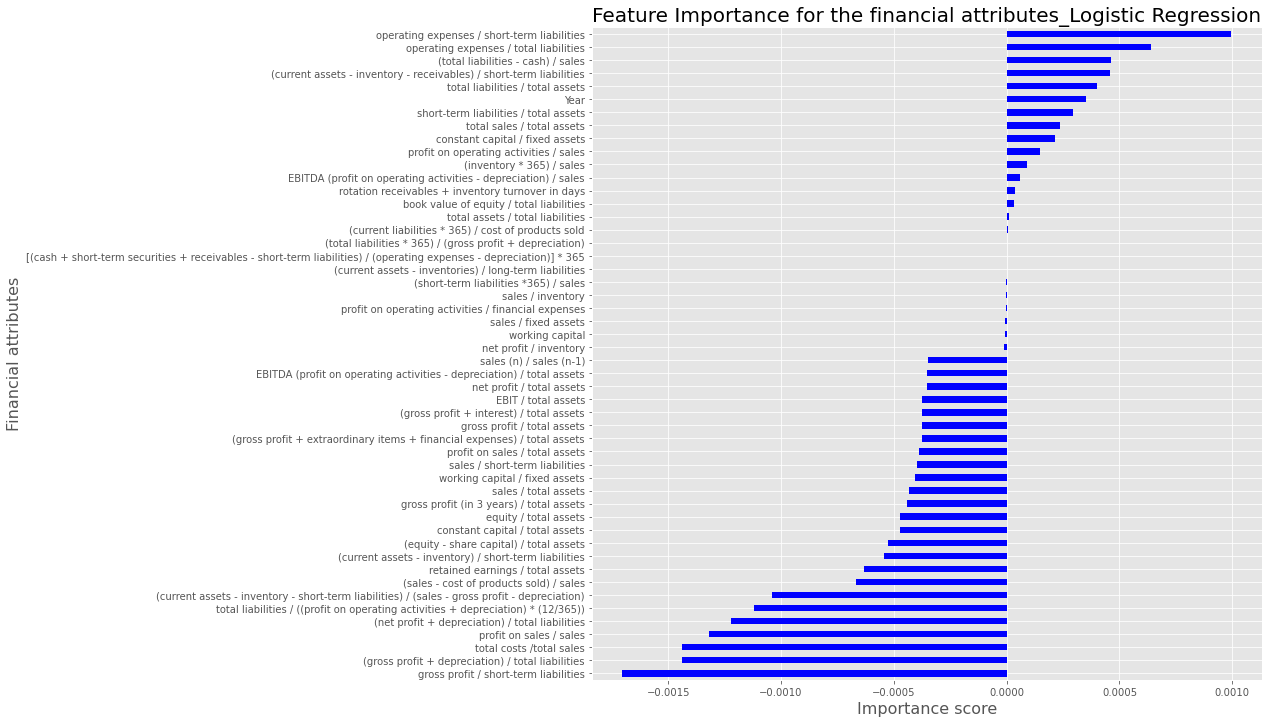

In [123]:
feature_weights_top = pd.Series(imp_score,index=column_list).sort_values(ascending=True).head(n =25)
feature_weights_bot = pd.Series(imp_score,index=column_list).sort_values(ascending=False).head(n = 25)

combined_feature_wts_high = [feature_weights_top, feature_weights_bot]
combined_feature_wts_high = pd.concat(combined_feature_wts_high).sort_values(ascending=True)

plt.style.use('ggplot')
plt.figure(figsize=(12,12))
combined_feature_wts_high.plot(kind='barh', color='blue')

plt.ylabel("Financial attributes", fontsize=16)
plt.xlabel("Importance score", fontsize=16)
plt.title('Feature Importance for the financial attributes_Logistic Regression', fontsize=20)
plt.show()

**According to logistic regression, the top 4 most important features are:**  
- Gross profit/short-term liabilities.  
- (Gross profit+depreciation)/total liabilities. 
- Total costs/total sales.  
- profit on sales/sales.  

### Random Forest.  

In [82]:
features_list_rf = [x[0] for x in classif_eval['Random Forest'][4][:]]
imp_score_rf=[x[1] for x in classif_eval['Random Forest'][4][:]]

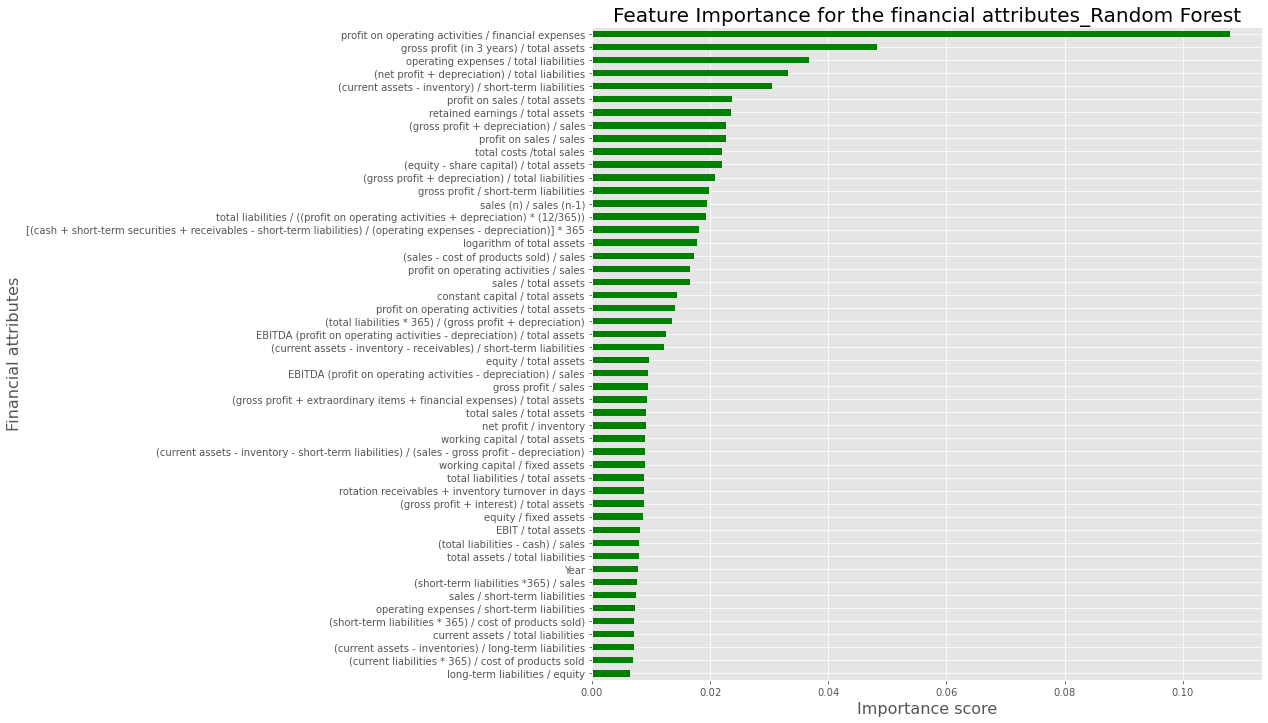

In [125]:
feature_weights_top = pd.Series(imp_score_rf,index=column_list).sort_values(ascending=True).head(n =25)
feature_weights_bot = pd.Series(imp_score_rf,index=column_list).sort_values(ascending=False).head(n = 25)

combined_feature_wts_high = [feature_weights_top, feature_weights_bot]
combined_feature_wts_high = pd.concat(combined_feature_wts_high).sort_values(ascending=True)

plt.style.use('ggplot')
plt.figure(figsize=(12,12))
combined_feature_wts_high.plot(kind='barh', color='green')

plt.ylabel("Financial attributes", fontsize=16)
plt.xlabel("Importance score", fontsize=16)
plt.title('Feature Importance for the financial attributes_Random Forest', fontsize=20)
plt.show()

**According to random forest, the top 4 most important features are.**:  
- Profit on operating activities/financial expenses.  
- Gross profit(in 3 years)/total assets.  
- Operating expenses/total liabilities.  
- Net profit(+depreciation)/total liabilities.  
  

## Extreme Gradient Boosting  

In [213]:
# Feature importance obtained for XGBoost model.
classif_eval['XGBoost'][4]

{'38': 2.007838503095243,
 'Year': 3.4696120791426988,
 '39': 1.3610094229781804,
 '35': 0.9128830019562904,
 '22': 1.0277073043392313,
 '26': 4.621975625957112,
 '20': 1.924127291239614,
 '7': 1.1259935540135113,
 '1': 0.9347225571365426,
 '37': 1.4682734966778659,
 '29': 1.263286369995093,
 '56': 0.7292183613007692,
 '27': 0.8959612909430684,
 '55': 2.618106676510028,
 '2': 1.2938536886249485,
 '10': 1.165223337462249,
 '54': 1.267092737971662,
 '59': 1.4340026101905987,
 '44': 0.9906316202434312,
 '34': 2.3669533859748424,
 '28': 2.0743177720930053,
 '41': 1.7629511233793038,
 '15': 1.5988607057067303,
 '23': 1.581238632034447,
 '47': 1.344512340260189,
 '61': 1.1950245049702284,
 '40': 1.3750375635717114,
 '31': 1.0148309956929564,
 '0': 0.9685227203553715,
 '14': 0.9282390990071873,
 '5': 2.7280074316725798,
 '25': 2.9075808361317654,
 '60': 1.490888955262691,
 '12': 1.4586267141445692,
 '3': 1.7692806026165533,
 '8': 1.9124040946607752,
 '6': 1.0399877823499162,
 '52': 0.95516590

In [75]:
features_list_xgb = list(classif_eval['XGBoost'][4].keys())
imp_score_xgb=list(classif_eval['XGBoost'][4].values())

In [129]:
#Extract column list for the importance plot.
column_list_idx = [x[1] for x in all_cols[:]]
print(column_list_idx)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 'Year']


In [212]:
#Bind the score to column index.  
xgb_imp_cols = list(zip(features_list_xgb,imp_score_xgb))
xgb_imp_cols

[('26', 5.124138133433808),
 ('25', 4.812170374274355),
 ('45', 2.0008498365914114),
 ('46', 1.414841642332404),
 ('49', 2.0869823547797006),
 ('53', 0.9745647430134347),
 ('42', 0.8001160027041064),
 ('60', 1.8126981097957706),
 ('29', 1.5850493346876848),
 ('8', 3.88556228739173),
 ('20', 2.5984813021626088),
 ('23', 2.091745346398404),
 ('31', 1.4124590652481266),
 ('Year', 5.573378841302746),
 ('10', 1.6851752909078266),
 ('19', 1.5608742851980193),
 ('14', 1.0633517691308292),
 ('22', 1.5562664727703635),
 ('38', 2.066562878743813),
 ('1', 1.2689120276592771),
 ('35', 2.3823764439941555),
 ('55', 4.31870296417206),
 ('39', 1.5394580824465467),
 ('28', 1.6938814233967696),
 ('34', 3.2940048993688533),
 ('15', 2.1662419496000007),
 ('41', 2.064809450327719),
 ('7', 1.5808199672771932),
 ('36', 1.1240496524110093),
 ('57', 2.1559157760094734),
 ('4', 3.910768050433972),
 ('0', 1.0991193726342101),
 ('24', 1.4557686656924642),
 ('43', 2.8067092558700737),
 ('63', 1.0428289971162292),


In [211]:
#The int() cannot work with 'Year' str. See next lines.  
col_keys_year=[i for i in xgb_imp_cols if i[0] =='Year']
col_keys_year

[('Year', 5.573378841302746)]

WE need to sort the column indices and replace them with the column names.  
But the column indices are currently in string type.  
so we extract these columns and convert them to integars.
We then store the values as dictionary that will be later sorted.

In [196]:

col_keys=[int(i[0]) for i in xgb_imp_cols if i[0] !='Year']
imp_col=[i[1] for i in xgb_imp_cols if i[0] !='Year']
feat_imp_xgb_dict=dict(zip(col_keys,imp_col))
feat_imp_xgb_dict

{26: 5.124138133433808,
 25: 4.812170374274355,
 45: 2.0008498365914114,
 46: 1.414841642332404,
 49: 2.0869823547797006,
 53: 0.9745647430134347,
 42: 0.8001160027041064,
 60: 1.8126981097957706,
 29: 1.5850493346876848,
 8: 3.88556228739173,
 20: 2.5984813021626088,
 23: 2.091745346398404,
 31: 1.4124590652481266,
 10: 1.6851752909078266,
 19: 1.5608742851980193,
 14: 1.0633517691308292,
 22: 1.5562664727703635,
 38: 2.066562878743813,
 1: 1.2689120276592771,
 35: 2.3823764439941555,
 55: 4.31870296417206,
 39: 1.5394580824465467,
 28: 1.6938814233967696,
 34: 3.2940048993688533,
 15: 2.1662419496000007,
 41: 2.064809450327719,
 7: 1.5808199672771932,
 36: 1.1240496524110093,
 57: 2.1559157760094734,
 4: 3.910768050433972,
 0: 1.0991193726342101,
 24: 1.4557686656924642,
 43: 2.8067092558700737,
 63: 1.0428289971162292,
 62: 2.0712144931839496,
 33: 6.5799836714247695,
 52: 1.0610642802413108,
 11: 0.7896486518689111,
 40: 1.8929614402857902,
 5: 1.98103479131224,
 6: 0.9547707072797

In [210]:
#To enable us bind the values to the column list we need to sort it.  
from collections import OrderedDict
feat_imp_xgb_dict_ = OrderedDict(sorted(feat_imp_xgb_dict.items()))
#dict1

In [209]:
##Add back the 'Year' value and extract the importance score. 
feat_imp_xgb_dict_[col_keys_year[0][0]]=col_keys_year[0][1]
importance_score_xgb=list(feat_imp_xgb_dict_.values())

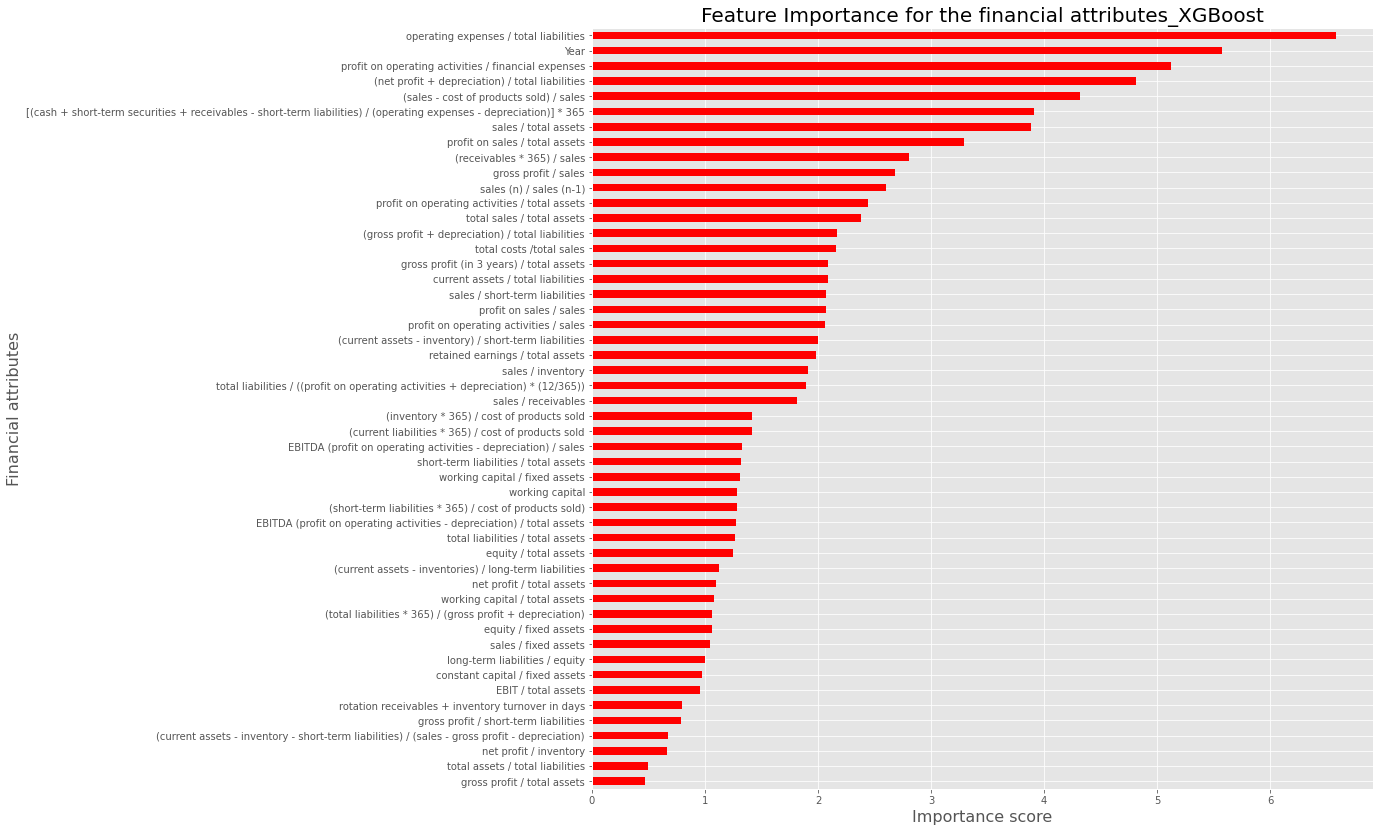

In [208]:
feature_weights_top = pd.Series(importance_score_xgb,index=column_list).sort_values(ascending=True).head(n =25)
feature_weights_bot = pd.Series(importance_score_xgb,index=column_list).sort_values(ascending=False).head(n = 25)

combined_feature_wts_high = [feature_weights_top, feature_weights_bot]
combined_feature_wts_high = pd.concat(combined_feature_wts_high).sort_values(ascending=True)

plt.style.use('ggplot')
plt.figure(figsize=(14,14))
combined_feature_wts_high.plot(kind='barh', color='red')

plt.ylabel("Financial attributes", fontsize=16)
plt.xlabel("Importance score", fontsize=16)
plt.title('Feature Importance for the financial attributes_XGBoost', fontsize=20)
plt.show()

**According to XGBoost the top 4 most influential features are:**  
1. Operating Expenses/Total Liabilities.  
2. Year.  
3. Profit on operating activities/ financial expenses.  
4. (Net profit + depreciation)/total liabilities.  

## Mean AUC for each classifer.  

## Feature importance for each classifier.  

# Conclusions.  
